In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def di(*args):
    fig2 = plt.figure(figsize = (15,10))
    num_args = len(*args)
    imgs = args[0]
    if num_args == 1:
        plt.subplot(111)
        plt.imshow(imgs[0],cmap = 'gray')
        plt.show()
    elif num_args == 2:
        plt.subplot(121)
        plt.imshow(imgs[0],cmap = 'gray')
        plt.subplot(122)
        plt.imshow(imgs[1],cmap = 'gray')
        plt.show()
    else:
        #i.e. 3 images
        plt.subplot(131)
        plt.imshow(imgs[0],cmap = 'gray')
        plt.subplot(132)
        plt.imshow(imgs[1],cmap = 'gray')
        plt.subplot(133)
        plt.imshow(imgs[2],cmap = 'gray')
        plt.show()

def d1(im, h=15, w=15):
    fig1 = plt.figure(figsize = (h,w))
    plt.subplot(111)
    plt.imshow(im)
    plt.show()

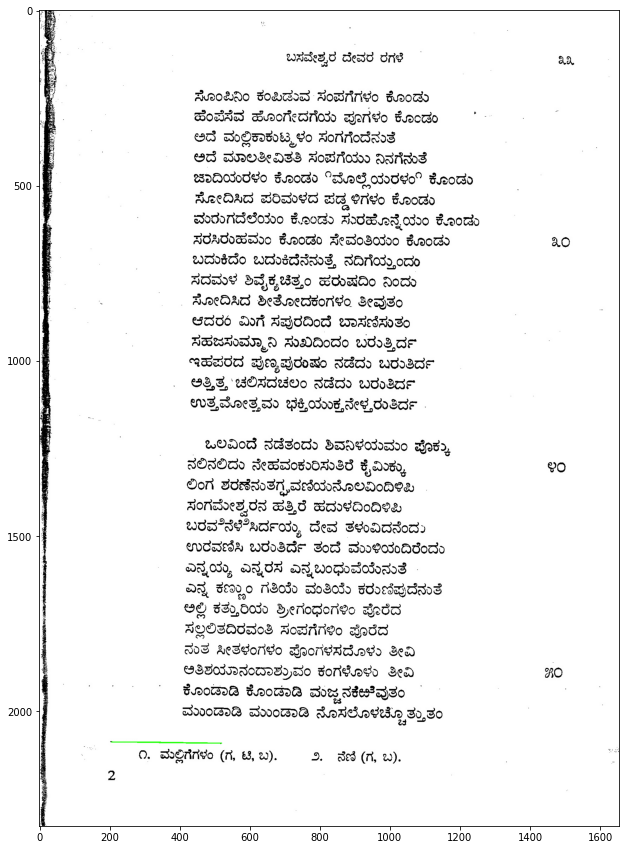

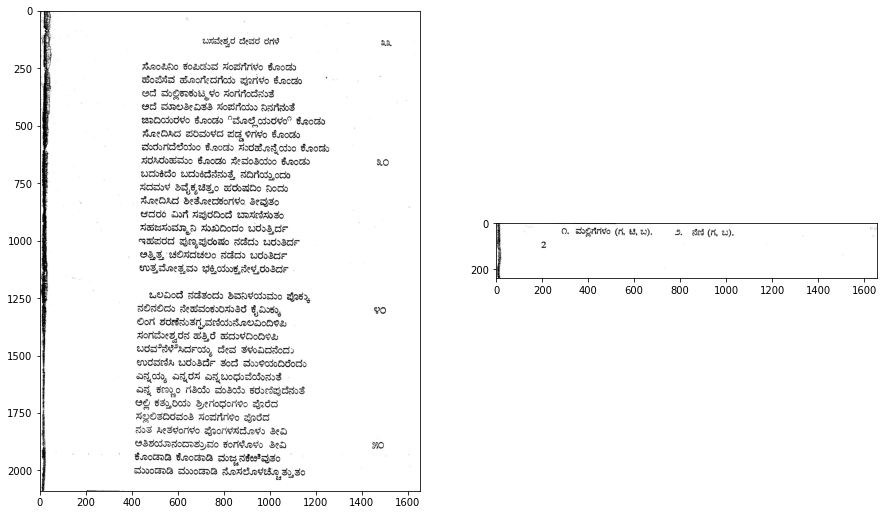

In [29]:
# Load image, convert to grayscale, Otsu's threshold
image = cv2.imread('harihara/pg86.jpg')
result = image.copy()
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Detect horizontal lines
# see https://stackoverflow.com/questions/7227074/horizontal-line-detection-with-opencv
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
horizontal_lines = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
horizontal_lines = horizontal_lines[0] if len(horizontal_lines) == 2 else horizontal_lines[1]
for c in horizontal_lines:
    cv2.drawContours(result, [c], -1, (36,255,12), 2)
d1(result)

# list of points defining the footer line. The list of points are not all on the same line (due to noise), 
# hence we need to get the average of the y coordinates to "mark" where the footer is
footer_points = []
for points in horizontal_lines:
    for point in points:
        footer_points.append(point[0][1])        
footer_line = int(sum(footer_points)/len(footer_points))

height, width, _ = image.shape
# the rest of the page without the footnotes
content = image[0:footer_line, 0:width]
# the actual footnotes
footnotes = image[footer_line:height, 0:width]
di((content, footnotes))

In [25]:
from pdf2image import convert_from_path

pages = convert_from_path("pdf_file_to_convert")
for page in pages:
    page.save("page_image.jpg", "jpg")

# Now you can use this image to apply opencv functions.

# You can use BytesIO to do your work without saving the file:

from io import BytesIO
from PIL import Image

with BytesIO() as f:
   page.save(f, format="jpg")
   f.seek(0)
   img_page = Image.open(f)

ModuleNotFoundError: No module named 'pdf2image'

In [27]:
import fitz
import numpy as np
import cv2

# file path you want to extract images from
file = "harihara/10pages.pdf"

with fitz.Document(file) as doc:
    for xref in {xref[0] for page in doc for xref in page.get_images(False) if xref[1] == 0}:
        # dictionary with image
        image_dict = doc.extract_image(xref)
        # image as OpenCV's Mat
        i = cv2.imdecode(np.frombuffer(image_dict["image"],np.dtype(f'u{image_dict["bpc"] // 8}')),cv2.IMREAD_GRAYSCALE)
        cv2.imshow("OpenCV", i)
        cv2.waitKey(0)

TypeError: data type 'u0' not understood

In [105]:
import pdf2image
def convert_pdf_to_image(document, dpi):
    images = []
    images.extend(
                    list(
                        map(
                            lambda image: cv2.cvtColor(
                                np.asarray(image), code=cv2.COLOR_BGR2GRAY
                            ),
                            pdf2image.convert_from_path(document, dpi=dpi),
                        )
                    )
                )
    return images

In [106]:
ten_pages = convert_pdf_to_image(file, 300)

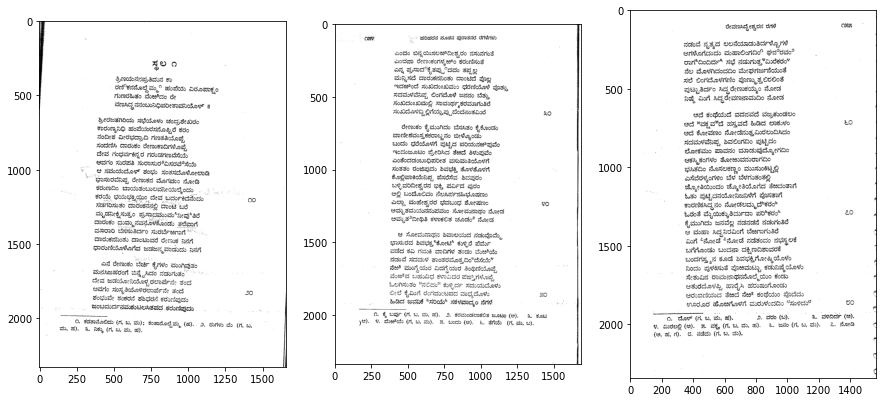

In [107]:
di(ten_pages)

In [119]:
detect_footer(ten_pages[0])

UnboundLocalError: local variable 'width' referenced before assignment

In [118]:
def detect_footer(image):
    # Load image, convert to grayscale, Otsu's threshold
    result = image.copy()
#     gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Detect horizontal lines
    # see https://stackoverflow.com/questions/7227074/horizontal-line-detection-with-opencv
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
    detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
    horizontal_lines = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    horizontal_lines = horizontal_lines[0] if len(horizontal_lines) == 2 else horizontal_lines[1]
    for c in horizontal_lines:
        cv2.drawContours(result, [c], -1, (36,255,12), 2)
#     d1(result)

    # list of points defining the footer line. The list of points are not all on the same line (due to noise), 
    # hence we need to get the average of the y coordinates to "mark" where the footer is
    footer_points = []
    for points in horizontal_lines:
        for point in points:
            footer_points.append(point[0][1])        
    footer_line = int(sum(footer_points)/len(footer_points))
    


    height, width = image.shape
    
    # display the image with the footnote line demarcated
    temp = image.copy()
    thickness = int(footer_line*0.0028)
    cv2.line(temp,(0,footer_line),(width,footer_line),(0,0,0),thickness)
    d1(temp)
    
    
    # the rest of the page without the footnotes
    content = image[0:footer_line, 0:width]
    # the actual footnotes
    footnotes = image[footer_line:height, 0:width]
    

    
    di((content, footnotes))  

In [94]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

NameError: name 'img' is not defined

# Attempt 3

In [38]:
# import the necessary packages
import numpy as np
import argparse
import imutils
import cv2
def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

In [58]:
import cv2
import numpy as npThank
from imutils import contours

def box_extraction(img_for_box_extraction_path, cropped_dir_path):
    img = cv2.imread(img_for_box_extraction_path, 0)  # Read the image
    (thresh, img_bin) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)  # Thresholding the image
    img_bin = 255-img_bin  # Invert the image
    cv2.imwrite("Image_bin.jpg",img_bin)
   
    # Defining a kernel length
    kernel_length = np.array(img).shape[1]//40
     
    # A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
    verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
    # A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
    hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
    # A kernel of (3 X 3) ones.
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# Morphological operation to detect verticle lines from an image
    img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
    verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
    cv2.imwrite("verticle_lines.jpg",verticle_lines_img)
# Morphological operation to detect horizontal lines from an image
    img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
    horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
    cv2.imwrite("horizontal_lines.jpg",horizontal_lines_img)
# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
    alpha = 0.5
    beta = 1.0 - alpha
    # This function helps to add two image with specific weight parameter to get a third image as summation of two image.
    img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
    img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
    (thresh, img_final_bin) = cv2.threshold(img_final_bin, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# For Debugging
    # Enable this line to see verticle and horizontal lines in the image which is used to find boxes
    cv2.imwrite("img_final_bin.jpg",img_final_bin)
    # Find contours for image, which will detect all the boxes
    contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # Sort all the contours by top to bottom.
#     (contours, boundingBoxes) = sort_contours(contours, method = "top-to-bottom")
    idx = 0
    for c in contours:
        # Returns the location and width,height for every contour
        x, y, w, h = cv2.boundingRect(c)
# If the box height is greater then 20, widht is >80, then only save it as a box in "cropped/" folder.
#     if (w > 80 and h > 20) and w > 3*h:
    idx += 1
    new_img = img[y:y+h, x:x+w]
    str1 = cropped_dir_path+str(idx) + '.png'
    print(str1)
    cv2.imwrite(str1, new_img)
#     box_extraction("41.jpg", "./Cropped/")

In [59]:
box_extraction('pg89.png', 'ex')

ex1.png


# Google Cloud OCR trial

In [7]:
img = 'pg89.png'

In [22]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

        print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [24]:
detect_text(image)

DefaultCredentialsError: Could not automatically determine credentials. Please set GOOGLE_APPLICATION_CREDENTIALS or explicitly create credentials and re-run the application. For more information, please see https://cloud.google.com/docs/authentication/getting-started